<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-11-18 10:46:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  43.7MB/s    in 0.8s    

2022-11-18 10:46:27 (43.7 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [31]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
# your code goes here
q = 'SELECT ConvertedComp FROM master'
df = pd.read_sql_query(q, conn)
df.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


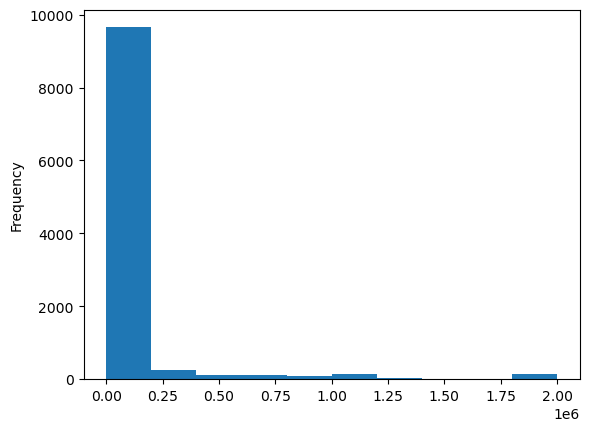

In [9]:
df['ConvertedComp'].plot(kind='hist')
plt.show()

### Box Plots


Plot a box plot of `Age.`


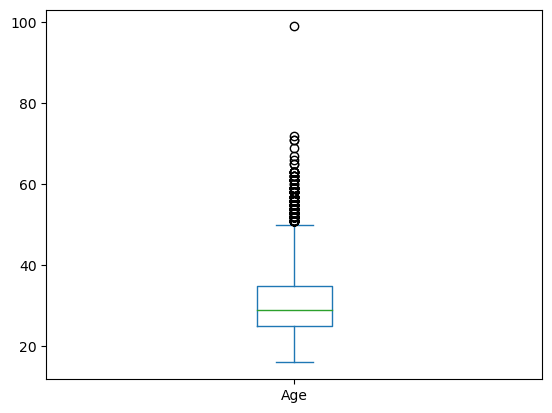

In [10]:
# your code goes here
q = 'SELECT * FROM master'
df = pd.read_sql_query(q, conn)
df['Age'].plot(kind='box')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


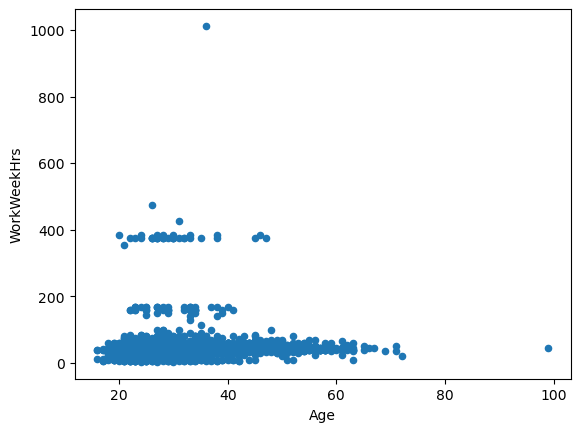

In [11]:
# your code goes here
df.plot(kind='scatter', x='Age', y='WorkWeekHrs')
plt.show()

In [12]:
df.corr()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
index,1.000000,0.999986,-0.013438,0.002212,-0.015365,0.004667,0.004177
Respondent,0.999986,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004048
CompTotal,-0.013438,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006966
ConvertedComp,0.002212,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105412
WorkWeekHrs,-0.015365,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036517
CodeRevHrs,0.004667,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020498
Age,0.004177,0.004048,0.006966,0.105412,0.036517,-0.020498,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [13]:
# your code goes here
# fig = px.scatter(df, x="WorkWeekHrs", y="CodeRevHrs", size="Age")
# fig.show()

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

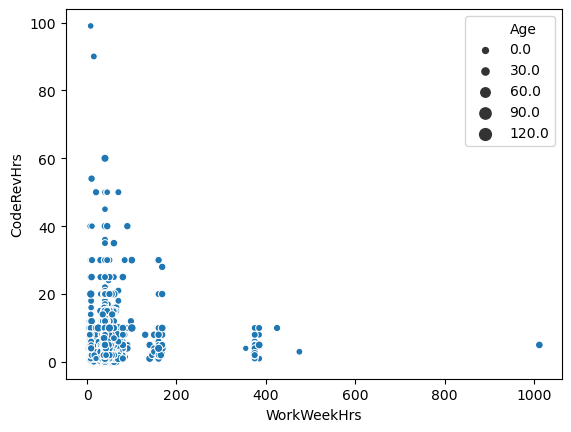

In [14]:
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=df)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [15]:
# your code goes here
q_d = 'SELECT * FROM DatabaseDesireNextYear'
df_d = pd.read_sql_query(q_d, conn)
df_d.columns

Index(['Respondent', 'DatabaseDesireNextYear'], dtype='object')

In [16]:
df_d.shape

(29575, 2)

In [17]:
top_5_d = df_d['DatabaseDesireNextYear'].value_counts()[:5]
top_5_d

PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: DatabaseDesireNextYear, dtype: int64

<AxesSubplot:ylabel='DatabaseDesireNextYear'>

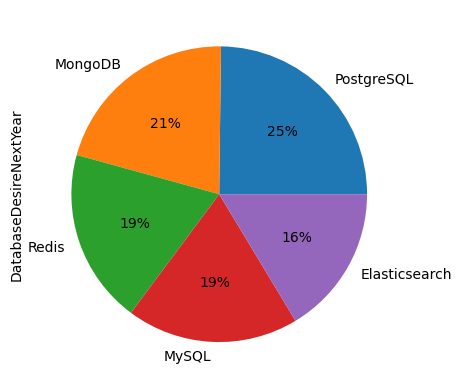

In [18]:
top_5_d.plot(kind='pie', autopct='%1.0f%%')

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

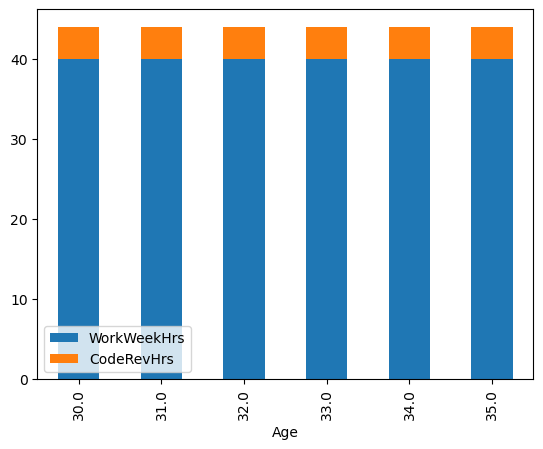

In [19]:
# your code goes here
df_s = df[(df['Age'] >= 30) & (df['Age'] <= 35)].groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
df_s.plot(kind='bar', stacked=True)

In [20]:
q_l = 'SELECT * FROM LanguageDesireNextYear'
df_l = pd.read_sql_query(q_l, conn)
df_l.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [21]:
df_l['LanguageDesireNextYear'].value_counts()

JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
C++                      1633
Rust                     1520
PHP                      1457
WebAssembly              1397
Swift                    1179
Ruby                     1029
C                        1028
Scala                     879
R                         850
Other(s):                 836
F#                        621
Elixir                    620
Dart                      610
Clojure                   413
Assembly                  336
Objective-C               310
Erlang                    310
VBA                       149
Name: LanguageDesireNextYear, dtype: int64

In [22]:
q_dc = 'SELECT * FROM DatabaseWorkedWith'
df_dc = pd.read_sql_query(q_dc, conn)

In [23]:
(df_dc.groupby('Respondent').sum()['DatabaseWorkedWith'] == 'MySQL').sum()

474

In [24]:
q_lc = 'SELECT * FROM LanguageWorkedWith'
df_lc = pd.read_sql_query(q_lc, conn)
df_lc['LanguageWorkedWith'].value_counts()['SQL']

7106

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

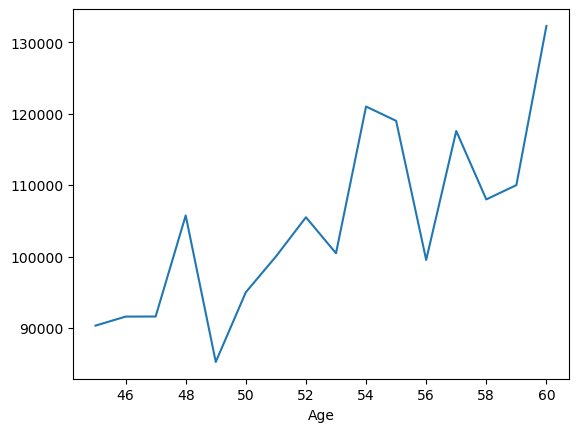

In [25]:
# your code goes here
df_line = df[(df['Age'] >= 45) & (df['Age'] <= 60)].groupby('Age')['ConvertedComp'].median()
df_line.plot(kind='line')

<AxesSubplot:xlabel='Age'>

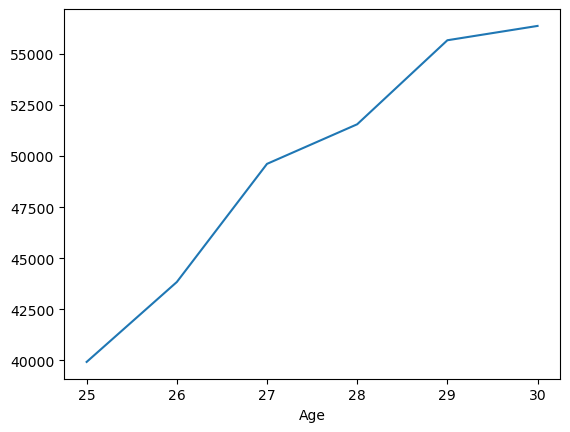

In [28]:
df[(df['Age'] >= 25) & (df['Age'] <= 30)].groupby('Age')['ConvertedComp'].median().plot(kind='line')

In [33]:
q_dt = 'SELECT * FROM DevType'
df_dt = pd.read_sql_query(q_dt, conn)
df_dt['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

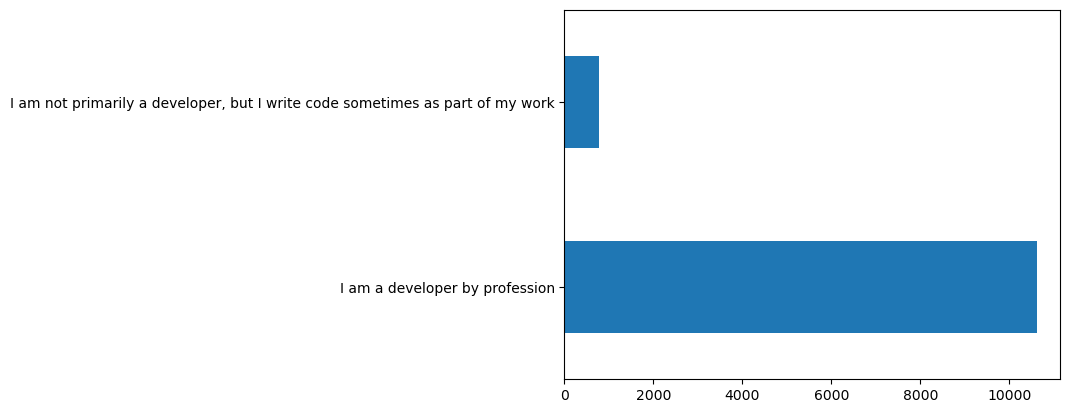

In [26]:
# your code goes here
df['MainBranch'].value_counts().plot(kind='barh')

Close the database connection.


In [34]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
